# DNA Microarray data classification

En este codigo vamos a cargar un dataset con datos de microarreglos de ADN y vamos a entrenar un MLP simple para ver si podemos reconocer padecimientos. 

El dataset contiene datos equivalentes a 174 pacientes y para cada uno de ellos se han tomado 12533 mediciones de expresiones de genes, los cuales mapean a 11 diferentes tipos de cancer. 



Importamos pandas y numpy y definimos el calculo de la precision usando la matriz de confusion.

In [ ]:
import pandas as pd
import numpy as np


# Confusion matrix 
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

Cargaremos los datos

In [3]:
# Load data. The original dataset includes names in first row
dataset = pd.read_csv("data11tumors2.csv")


Separamos los atributos de la clase. 

In [5]:
# Separate the class from the attributes
target = pd.DataFrame(dataset, columns= ['Class'])
#print (target)
attributes= dataset.loc[ : , dataset.columns != 'Class']
print(attributes)

      D1   D2   D3  D4   D5  ...  D12529  D12530  D12531  D12532  D12533
0    153  228   32  30  -36  ...     106     128       5      74    -188
1    154   99   43  55   66  ...     485     896      -2      91     -78
2     84   85   19  28 -104  ...      62      76     -47      92    -103
3    234  169   40  36   81  ...      60      69      22      89    -180
4    104   58   42  13  107  ...      60      50      30      74    -198
..   ...  ...  ...  ..  ...  ...     ...     ...     ...     ...     ...
169  157  578   40  58    5  ...      91     180      -4      60    -142
170  286  882  110 -19 -142  ...      36      58      44     161    -433
171  579  667   55 -41  -98  ...       8      77     -42     171    -371
172  252  582   88   3   44  ...      43      73       0     201    -333
173   83  420   14  84   12  ...      32      30      12      80    -180

[174 rows x 12533 columns]


Ahora separamos el dataset en un conjunto de entrenamiento y uno de validacion.


In [6]:
#Splitting the dataset into  training and validation sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(
    attributes,target,test_size=0.33, random_state=50)

Aqui vamos a crear un modelo MLP, inicializarlo y a correrlo para entrenar con el dataset.

In [7]:
# Train one model with raw data to establish a reference.
# In this case, we will train a MLP
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(100,50,10), max_iter=1000,
                           activation = 'relu',solver='adam',random_state=1)

#Fitting the training data to the network
classifier.fit(X_train, y_train.values.ravel())

#Predicting y for X_val
y_pred = classifier.predict(X_test)

Ahora evaluaremos su desempeno calculando la matriz de confusion


In [10]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print("Accuracy of MLPClassifier with raw data: ", accuracy(cm))

Accuracy of MLPClassifier with raw data:  0.1206896551724138


Mostremos la matriz de confusion

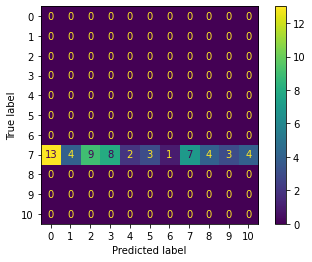

In [18]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

Ahora haremos uso de la reducci'on de dimensiones a traves de PCA


In [22]:
# Up to here, we are working on the original space (n dimensions)
# We will reduce the dimensions by computing PCA and take m dimensions
# where m<n


# Principal Component Analysis for dimension reduction

from sklearn.decomposition import PCA
pca = PCA(0.80)

# Fit PCA on training set
pca.fit(X_train)

# We need to transform the original split sets into the new subspace
# given by PCA. This is done for both X_train and X_test
# Apply the mapping (transform) to both the training set and the test set.
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#print(pca.n_components_)

print("shape of X_pca", X_train_pca.shape, X_test_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)


print('suma:',sum(expl[0:20]))


shape of X_pca (116, 22) (58, 22)
[0.19029078 0.11984082 0.0988422  0.08381113 0.04508493 0.03243
 0.0309113  0.0269173  0.01963236 0.01921148 0.01727664 0.01590189
 0.01406194 0.01263286 0.01147937 0.01073067 0.00989056 0.009495
 0.00893307 0.00855526 0.0081324  0.00749539]
suma: 0.7859295507463988


Ahora volveremos a entrenar un MLP pero con las dimensiones generadas mediante el PCA

In [23]:
#Initializing the MLPClassifier
classifier_pca = MLPClassifier(hidden_layer_sizes=(500,100,50), max_iter=1000,
                           activation = 'relu',solver='adam',random_state=1)

#Fitting the training data to the network
classifier_pca.fit(X_train_pca, y_train.values.ravel())

#Predicting y for X_val
y_pred_pca = classifier_pca.predict(X_test_pca)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_test
cm = confusion_matrix(y_pred_pca, y_test)

#Printing the accuracy
print("Accuracy of MLPClassifier with PCA data: ", accuracy(cm))

Accuracy of MLPClassifier with PCA data:  0.7413793103448276


Mostremos de nuevo la matriz de confusion

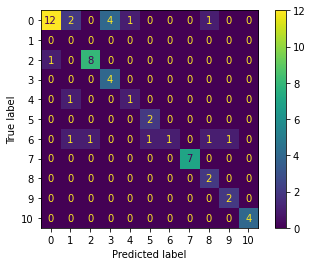

In [24]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier_pca.classes_)
disp.plot()
plt.show()